## S&P500 vs MSCI World return comparison (ETF)

In [1]:
import pandas as pd
import numpy as nm
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# We set our list of trackers
ETF_list = ['CSPX.L', 'IWDA.L']

In [3]:
# We download the closing price data
data = yf.download(ETF_list, period='10y', interval='1mo')['Close']
data.tail()

[*********************100%***********************]  2 of 2 completed


,CSPX.L,IWDA.L
Date,,
2024-03-01,552.489990,98.760002
2024-04-01,534.479980,95.750000
2024-05-01,548.969971,98.360001
2024-06-01,571.559998,100.639999
2024-06-14,571.559998,100.639999


In [4]:
# We calculate the monthly return
returns = data.pct_change()
returns = returns.dropna(axis=0)
returns.describe()

,CSPX.L,IWDA.L
count,120.000000,120.000000
mean,0.010701,0.008294
std,0.041445,0.041079
min,-0.097251,-0.110350
25%,-0.012505,-0.017275
50%,0.017777,0.013776
75%,0.035572,0.032654
max,0.105579,0.124177


In [5]:
# We calculate return delta between both ETF
returns['Delta'] = returns['CSPX.L'] - returns['IWDA.L']
returns.head()

,CSPX.L,IWDA.L,Delta
Date,,,
2014-08-01,0.032492,0.016957,0.015535
2014-09-01,-0.007854,-0.020486,0.012632
2014-10-01,0.015721,0.003405,0.012316
2014-11-01,0.031391,0.021328,0.010063
2014-12-01,0.006896,-0.009018,0.015913


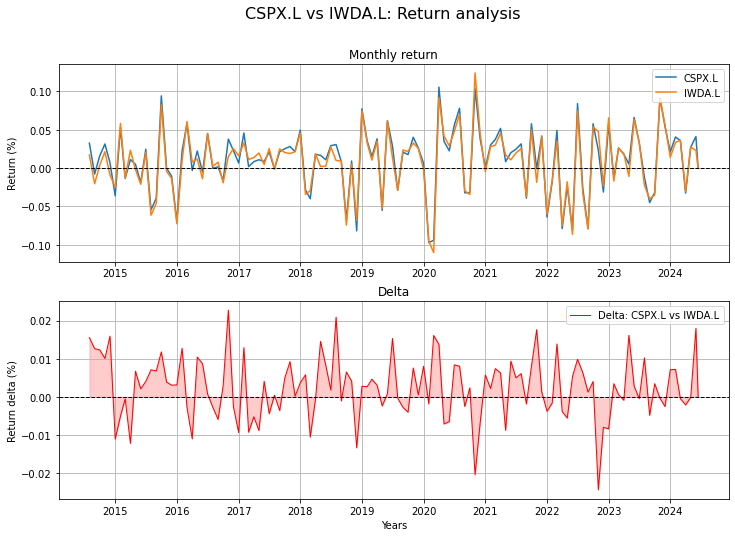

In [6]:
# We plot the returns and the delta
fig1 = plt.figure(figsize=(12, 8))
fig1.suptitle('{} vs {}: Return analysis'.format(ETF_list[0], ETF_list[1]), fontsize=16)

ax1 = fig1.add_subplot(211)
#ax1.set_xlabel("Year")
ax1.set_ylabel("Return (%)")
ax1.set_title("Monthly return")
for i in range(len(ETF_list)):
    ax1.plot(returns.iloc[:, i], linewidth=1.5, label=ETF_list[i])
ax1.legend(loc='upper right')
ax1.axhline(y=0.0, color='black', linestyle='--', linewidth=1.0)
ax1.grid()

ax2 = fig1.add_subplot(212)
ax2.set_xlabel("Years")
ax2.set_ylabel("Return delta (%)")
ax2.set_title("Delta")
ax2.plot(returns.iloc[:, 2], linewidth=1.0, label='Delta: {} vs {}'.format(ETF_list[0], ETF_list[1]), color='r')
ax2.fill_between(returns.index, returns.iloc[:, 2], 0.0, color='r', alpha=0.2)
ax2.legend(loc='upper right')
ax2.axhline(0.0, color='black', linestyle='--', linewidth=1.0)
ax2.grid()

#fig1.tight_layout()

In [7]:
# We canculate the percentage of time each ETF outperfom the other in different situation
returns_bull = returns[(returns['CSPX.L'] > 0) & (returns['IWDA.L'] > 0)]
returns_bear = returns[(returns['CSPX.L'] < 0) & (returns['IWDA.L'] < 0)]
returns_bull['Delta'] = returns_bull['CSPX.L'] - returns_bull['IWDA.L']
returns_bear['Delta'] = returns_bear['CSPX.L'] - returns_bear['IWDA.L']

nb_row = returns.shape[0]
nb_pos_delta = sum(returns['Delta'] > 0)
nb_neg_delta = sum(returns['Delta'] < 0)
nb_nul_delta = nb_row - (nb_pos_delta + nb_neg_delta)

nb_row_bull = returns_bull.shape[0]
nb_pos_delta_bull = sum(returns_bull['Delta'] > 0)
nb_neg_delta_bull = sum(returns_bull['Delta'] < 0)
nb_nul_delta_bull = nb_row_bull - (nb_pos_delta_bull + nb_neg_delta_bull)

nb_row_bear = returns_bear.shape[0]
nb_pos_delta_bear = sum(returns_bear['Delta'] > 0)
nb_neg_delta_bear = sum(returns_bear['Delta'] < 0)
nb_nul_delta_bear = nb_row_bear - (nb_pos_delta_bear + nb_neg_delta_bear)

C:\Users\decoo\Miniconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\decoo\Miniconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


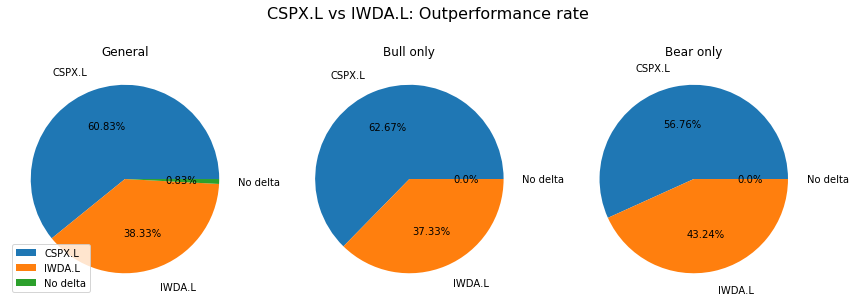

In [8]:
fig2 = plt.figure(figsize = (12, 5))
fig2.suptitle('{} vs {}: Outperformance rate'.format(ETF_list[0], ETF_list[1]), fontsize=16)

ax1 = fig2.add_subplot(131)
ax1.set_title("General")
x1 = [nb_pos_delta, nb_neg_delta, nb_nul_delta]
ax1.pie(x1, labels = [ETF_list[0], ETF_list[1], 'No delta'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.6, labeldistance = 1.2)
ax1.legend(loc='lower left')

ax2 = fig2.add_subplot(132)
ax2.set_title("Bull only")
x2 = [nb_pos_delta_bull, nb_neg_delta_bull, nb_nul_delta_bull]
ax2.pie(x2, labels = [ETF_list[0], ETF_list[1], 'No delta'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.6, labeldistance = 1.2)

ax3 = fig2.add_subplot(133)
ax3.set_title("Bear only")
x3 = [nb_pos_delta_bear, nb_neg_delta_bear, nb_nul_delta_bear]
ax3.pie(x3, labels = [ETF_list[0], ETF_list[1], 'No delta'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.6, labeldistance = 1.2)

fig2.tight_layout()